In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#help(plt.scatter)

review=pd.read_csv('/Users/ajay/Documents/IpyNote/wine-reviews/winemag-data_first150k.csv')
review.shape

(150930, 11)

In [2]:
review.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
review.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [5]:
list(review)


['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [6]:
review.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [7]:
review['region_2']

0                            Napa
1                             NaN
2                          Sonoma
3               Willamette Valley
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8               Willamette Valley
9                          Sonoma
10                            NaN
11              Willamette Valley
12              Willamette Valley
13                            NaN
14              Willamette Valley
15              Willamette Valley
16                           Napa
17                            NaN
18                            NaN
19                         Sonoma
20                           Napa
21                            NaN
22                            NaN
23                  Central Coast
24                  Central Coast
25                            NaN
26                            NaN
27              Willamette Valley
28                  Central Coast
29            

In [8]:
list(review)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [9]:
review.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


In [10]:
#groupby is a Series function
review.groupby('country')['points'].mean().sort_values()

country
South Korea               81.500000
Montenegro                82.000000
China                     82.000000
Brazil                    83.240000
Slovakia                  83.666667
Egypt                     83.666667
Lithuania                 84.250000
Uruguay                   84.478261
Ukraine                   84.600000
Moldova                   84.718310
Bosnia and Herzegovina    84.750000
Mexico                    84.761905
Macedonia                 84.812500
Romania                   84.920863
Japan                     85.000000
Bulgaria                  85.467532
Georgia                   85.511628
Lebanon                   85.702703
Czech Republic            85.833333
Cyprus                    85.870968
Argentina                 85.996093
Tunisia                   86.000000
Greece                    86.117647
Croatia                   86.280899
Chile                     86.296768
Spain                     86.646589
Luxembourg                87.000000
Israel              

In [11]:
review[review['country']=='India']#['description']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1156,1156,India,"Dark violet-red in color, this wine has a bouq...",Estate Bottled,90,13.0,Nashik,NaN,NaN,Shiraz,Sula
2292,2292,India,"Aromas of blackberry, cherry preserves, white ...",Estate Bottled,91,12.0,Nashik,NaN,NaN,Shiraz,Sula
3145,3145,India,A nose of cut herbs and just-mown grass backed...,NaN,89,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3174,3174,India,"Aromas of pink grapefruit, grass and coriander...",NaN,90,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3840,3840,India,"Pineapple, grapefruit, and apricot show bright...",NaN,90,10.0,Nashik,NaN,NaN,Chenin Blanc,Sula
7804,7804,India,This wine features a fresh nose of grapefruit ...,NaN,87,12.0,Nashik,NaN,NaN,Chenin Blanc,Sula
36579,36579,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine
80529,80529,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine


In [12]:
review.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
review[review.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
420,US,"Though just four years old, this wine seems ad...",NaN,87,36.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Dussek Family Cellars
422,US,Tawny in color and wafting of potpourri and fa...,NaN,87,20.0,New York,Finger Lakes,Finger Lakes,Cabernet Franc,Serenity
423,US,"The aromas on this wine are quite light, conve...",Weinbau,87,32.0,Washington,Wahluke Slope,Columbia Valley,Grenache,Sol Stone
424,Spain,"A mix of smoke and toast blends with fresh, cr...",Yá Cuvée 23 Brut Rosé,87,18.0,Catalonia,Cava,NaN,Sparkling Blend,Sumarroca
480,US,Made from what Californians call the Pommard c...,Charles Vineyard Clone O5,89,49.0,California,Anderson Valley,Mendocino/Lake Counties,Pinot Noir,Foursight
481,Greece,"Aromas of leather, cherry and plum lead this b...",NaN,89,17.0,Nemea,NaN,NaN,Agiorgitiko,Boutari
563,US,"Seductive, spicy oak in the aromas and flavors...",NaN,90,40.0,California,Red Hills Lake County,Mendocino/Lake Counties,Cabernet Sauvignon,Boatique
567,Germany,"Apple, pear and stone-fruit flavors are vibran...",Bernkasteler Badstube Kabinett,90,31.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Thanisch)


In [14]:
review[review['country']=='India']#['description']

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1156,India,"Dark violet-red in color, this wine has a bouq...",Estate Bottled,90,13.0,Nashik,NaN,NaN,Shiraz,Sula
2292,India,"Aromas of blackberry, cherry preserves, white ...",Estate Bottled,91,12.0,Nashik,NaN,NaN,Shiraz,Sula
3145,India,A nose of cut herbs and just-mown grass backed...,NaN,89,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3174,India,"Aromas of pink grapefruit, grass and coriander...",NaN,90,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3840,India,"Pineapple, grapefruit, and apricot show bright...",NaN,90,10.0,Nashik,NaN,NaN,Chenin Blanc,Sula
7804,India,This wine features a fresh nose of grapefruit ...,NaN,87,12.0,Nashik,NaN,NaN,Chenin Blanc,Sula
36579,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine
80529,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine


In [15]:
review[review['country']=='India'].duplicated()#['description']

1156     False
2292     False
3145     False
3174     False
3840     False
7804     False
36579    False
80529     True
dtype: bool

In [16]:
review.count()

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [17]:
review.duplicated().count()

150930

In [18]:
review.drop_duplicates(inplace=True)

In [19]:
review.shape

(97851, 10)

In [20]:
my_dict=review.groupby('country').groups#[:]#.value_counts()

In [21]:
temp_count=[]
for key,value in my_dict.items():
    temp_count.append([key,len(list(value))])
    #print(key,len(list(value)))

In [22]:
temp_count

[['Albania', 1],
 ['Argentina', 3447],
 ['Australia', 3152],
 ['Austria', 1959],
 ['Bosnia and Herzegovina', 3],
 ['Brazil', 14],
 ['Bulgaria', 56],
 ['Canada', 149],
 ['Chile', 3735],
 ['China', 2],
 ['Croatia', 70],
 ['Cyprus', 15],
 ['Czech Republic', 6],
 ['Egypt', 3],
 ['England', 9],
 ['France', 14459],
 ['Georgia', 30],
 ['Germany', 1529],
 ['Greece', 541],
 ['Hungary', 139],
 ['India', 7],
 ['Israel', 370],
 ['Italy', 14850],
 ['Japan', 1],
 ['Lebanon', 27],
 ['Lithuania', 4],
 ['Luxembourg', 3],
 ['Macedonia', 12],
 ['Mexico', 54],
 ['Moldova', 46],
 ['Montenegro', 1],
 ['Morocco', 11],
 ['New Zealand', 1865],
 ['Portugal', 3508],
 ['Romania', 106],
 ['Serbia', 10],
 ['Slovakia', 2],
 ['Slovenia', 72],
 ['South Africa', 1481],
 ['South Korea', 2],
 ['Spain', 5443],
 ['Switzerland', 4],
 ['Tunisia', 2],
 ['Turkey', 46],
 ['US', 40544],
 ['US-France', 1],
 ['Ukraine', 5],
 ['Uruguay', 52]]

In [23]:
review[review.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [24]:
review.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [25]:
print("review['country'].value_counts()\n",review['country'].value_counts())  #looks as if the top 12 are majority and share good numbers
print(type(review['country'].value_counts()[0:12]))

review['country'].value_counts()
 US                        40544
Italy                     14850
France                    14459
Spain                      5443
Chile                      3735
Portugal                   3508
Argentina                  3447
Australia                  3152
Austria                    1959
New Zealand                1865
Germany                    1529
South Africa               1481
Greece                      541
Israel                      370
Canada                      149
Hungary                     139
Romania                     106
Slovenia                     72
Croatia                      70
Bulgaria                     56
Mexico                       54
Uruguay                      52
Turkey                       46
Moldova                      46
Georgia                      30
Lebanon                      27
Cyprus                       15
Brazil                       14
Macedonia                    12
Morocco                      11
Serbia

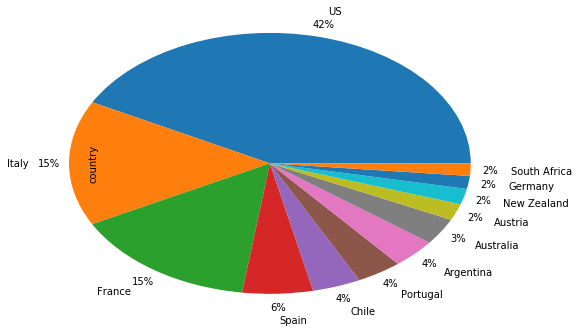

In [26]:
review['country'].value_counts()[0:12].plot.pie(radius=1.5,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

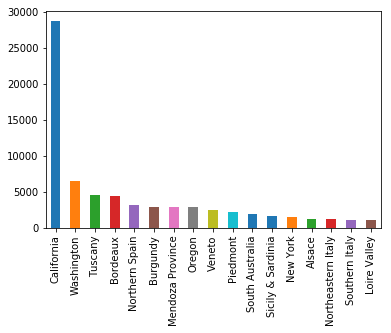

In [27]:
review.province.value_counts()[0:17].plot.bar()

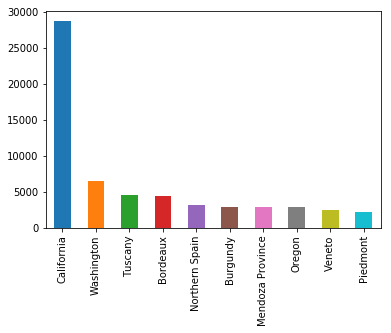

In [28]:
review['province'].value_counts().head(10).plot.bar()

<class 'pandas.core.series.Series'>
28800


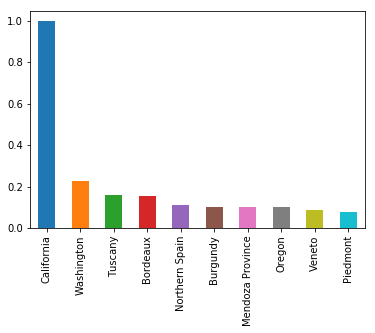

In [29]:
print(type(review['province'].value_counts().head(1)))
obj=review['province'].value_counts().head(1)
print(obj['California'])

(review['province'].value_counts().head(10)/obj['California']).plot.bar()

In [30]:
review['points'].value_counts()
#the statement till value_counts() will print the points along with their frequency in decreasing order of frequency

87     12830
88     11624
90     10703
86      9919
89      8553
85      8013
91      7191
84      6870
92      6130
93      4019
83      3751
82      2491
94      2332
95      1132
81       951
80       562
96       440
97       226
98        75
99        28
100       11
Name: points, dtype: int64

In [31]:
review['points'].value_counts().index#.plot.line()

Int64Index([ 87,  88,  90,  86,  89,  85,  91,  84,  92,  93,  83,  82,  94,
             95,  81,  80,  96,  97,  98,  99, 100],
           dtype='int64')

In [32]:
review['points'].value_counts().sort_index()

80       562
81       951
82      2491
83      3751
84      6870
85      8013
86      9919
87     12830
88     11624
89      8553
90     10703
91      7191
92      6130
93      4019
94      2332
95      1132
96       440
97       226
98        75
99        28
100       11
Name: points, dtype: int64

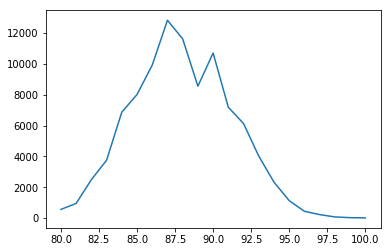

In [33]:
review['points'].value_counts().sort_index().plot.line()

In [34]:
review[review['price']>300].count().sum()

1814

In [35]:
review['price'].describe()

count    89131.000000
mean        33.658783
std         37.670180
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: price, dtype: float64

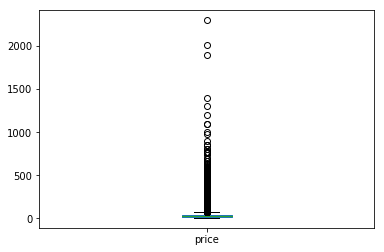

In [36]:
review['price'].count()
review['price'].plot.box()

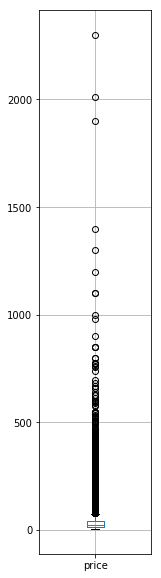

In [37]:
review.boxplot('price',figsize=(2,10))

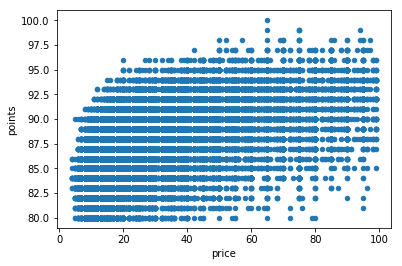

In [38]:
review[review['price']<100].plot.scatter(x='price',y='points')

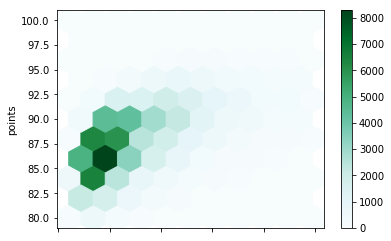

In [39]:
review[review['price']<100].plot.hexbin(x='price',y='points',gridsize=10)
#hex-binning used when no. of data points are high and overlap in a scatter plot

In [40]:
winecount=pd.read_csv('/Users/Ajay/Documents/IPyNote/most-common-wine-scores/top-five-wine-score-counts.csv',index_col=0)
#Picks the five most common types of wines and counts, for each of the possible point values, how many of that type of wine got that score.
topfive=pd.read_csv('/Users/Ajay/Documents/IPyNote/most-common-wine-scores/top-five-wine-scores.csv')
#lists the scores received by the various wines rated amongst the five most common types.

In [41]:
winecount.shape
winecount

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0
85,310.0,1048.0,1244.0,873.0,587.0
86,354.0,1194.0,1472.0,1218.0,871.0
87,510.0,1566.0,1809.0,1726.0,1233.0
88,498.0,1141.0,1416.0,1474.0,1260.0


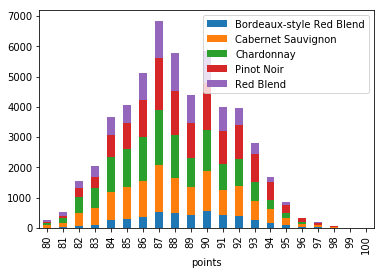

In [42]:
winecount.plot.bar(stacked=True)

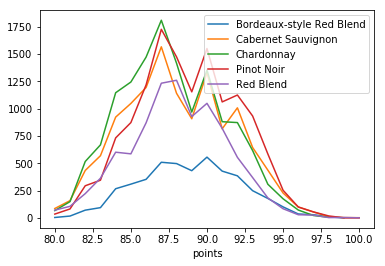

In [43]:
winecount.plot.line()

In [44]:
type(review['points'].value_counts().sort_index())
review['points'].value_counts().sort_index()

80       562
81       951
82      2491
83      3751
84      6870
85      8013
86      9919
87     12830
88     11624
89      8553
90     10703
91      7191
92      6130
93      4019
94      2332
95      1132
96       440
97       226
98        75
99        28
100       11
Name: points, dtype: int64

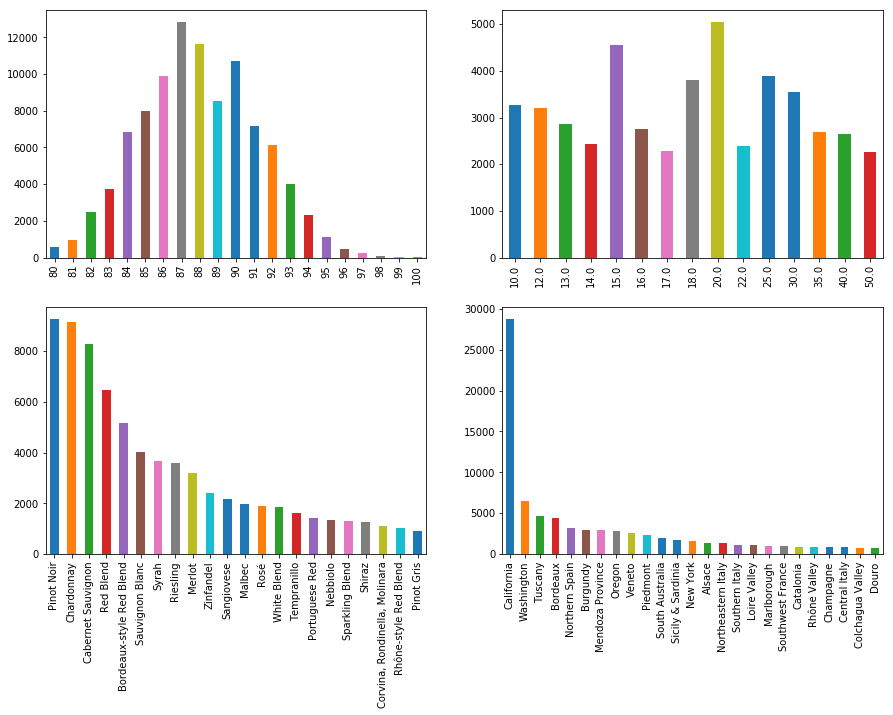

In [45]:
fig,axarr=plt.subplots(2,2,figsize=(15,10))
review['points'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
review['price'].value_counts().head(15).sort_index().plot.bar(ax=axarr[0][1])
review['variety'].value_counts().head(22).plot.bar(ax=axarr[1][0])
review['province'].value_counts().head(25).plot.bar(ax=axarr[1][1])

357
<class 'pandas.core.series.Series'>
Float64Index([10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 22.0, 25.0,
              30.0, 35.0, 40.0, 50.0],
             dtype='float64')
[3263 3204 2869 2437 4544 2747 2275 3795 5042 2398 3880 3540 2699 2637 2257]


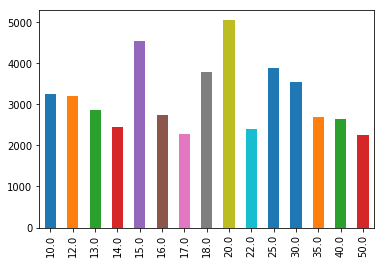

In [46]:
print(review['price'].nunique())
print(type(review['price'].value_counts()))
print(review['price'].value_counts().head(15).sort_index().index)
print(review['price'].value_counts().head(15).sort_index().values)
review['price'].value_counts().head(15).sort_index().plot.bar()
#plt.hist(x=)
#plt.show()

In [47]:
review[(review['price']>=4) & (review['price']<=500)]['price'].sort_values()

119285      4.0
25645       4.0
1858        4.0
36716       4.0
73417       4.0
119295      4.0
34415       4.0
90546       4.0
118347      4.0
34682       4.0
99045       4.0
114167      4.0
112491      5.0
143670      5.0
114904      5.0
65265       5.0
141128      5.0
146395      5.0
114362      5.0
114647      5.0
113776      5.0
36356       5.0
36352       5.0
143406      5.0
136436      5.0
81063       5.0
5609        5.0
69542       5.0
114079      5.0
114631      5.0
          ...  
68245     450.0
10538     450.0
68393     450.0
2155      450.0
127780    450.0
52262     451.0
127794    455.0
24162     460.0
24173     460.0
24151     460.0
13143     463.0
111362    467.0
11566     468.0
76118     475.0
101474    486.0
104218    495.0
104212    495.0
73118     495.0
104206    495.0
127779    500.0
3033      500.0
898       500.0
114280    500.0
115160    500.0
128118    500.0
11389     500.0
115162    500.0
128104    500.0
29227     500.0
7691      500.0
Name: price, Length: 890

In [48]:
print(review.variety.shape)
print(review.variety.nunique())

(97851,)
632


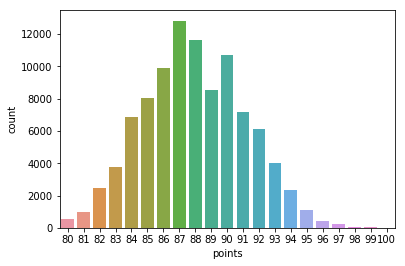

In [49]:
sns.countplot(review['points']) #same as value_counts()

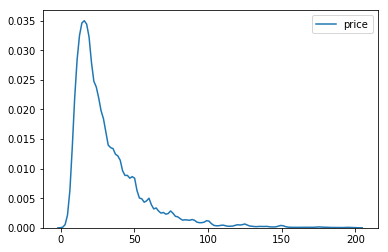

In [50]:
sns.kdeplot(review[review['price']<200]['price']) #by default the plot is drawn by sorting by indices(sorted by price)

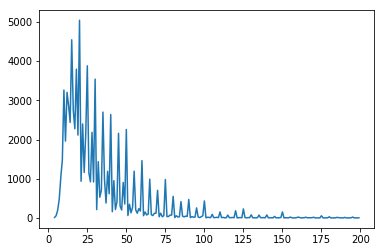

In [51]:
review[review['price']<200]['price'].value_counts().sort_index().plot.line()


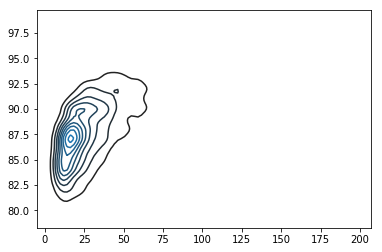

In [52]:
sns.kdeplot(review[review['price'] < 200].loc[:, ['price', 'points',]].dropna().sample(5000))

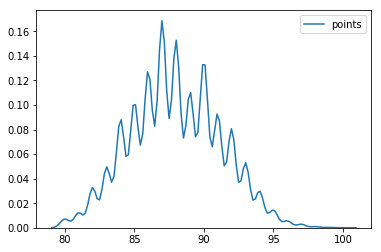

In [53]:
sns.kdeplot(review['points'])

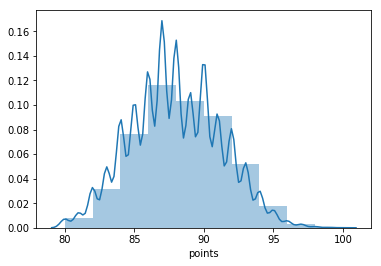

In [54]:
sns.distplot(review['points'],bins=10,kde=True)

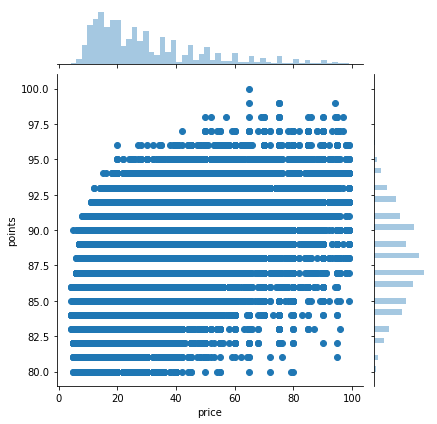

In [55]:
sns.jointplot(x='price',y='points',data=review[review['price']<100])

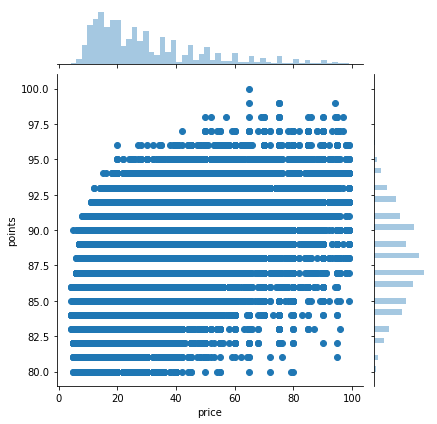

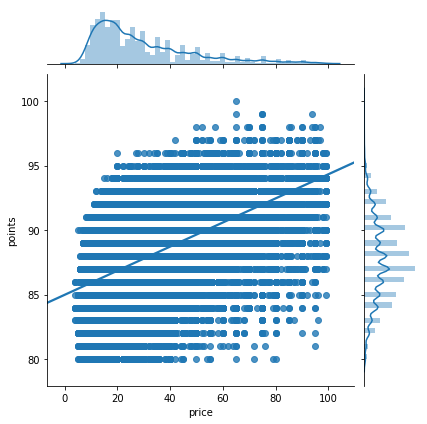

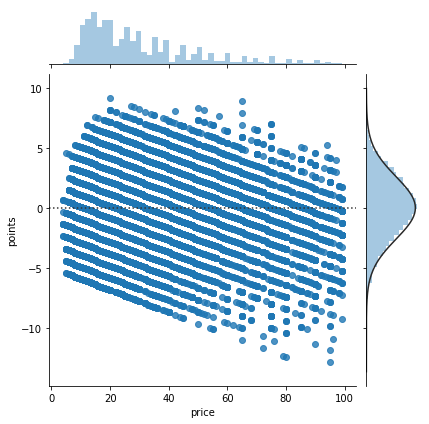

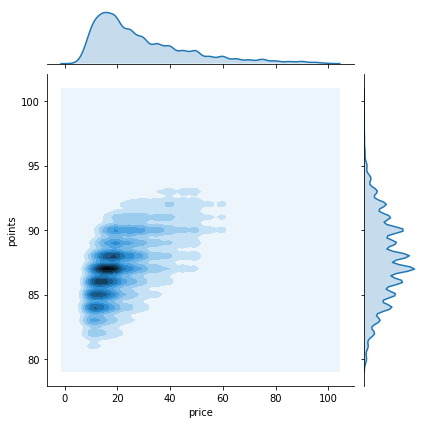

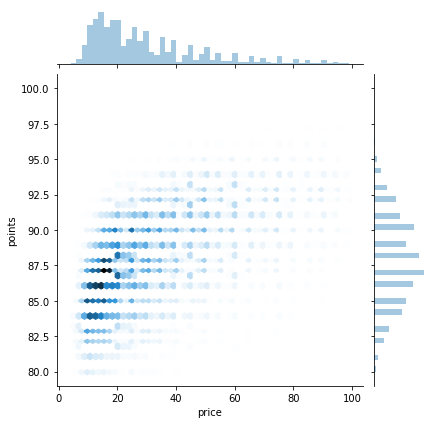

In [56]:
kind =[ 'scatter' , 'reg' , 'resid' , 'kde' , 'hex' ]
for i in kind:
    sns.jointplot(x='price', y='points', data=review[review['price'] < 100],kind=i)

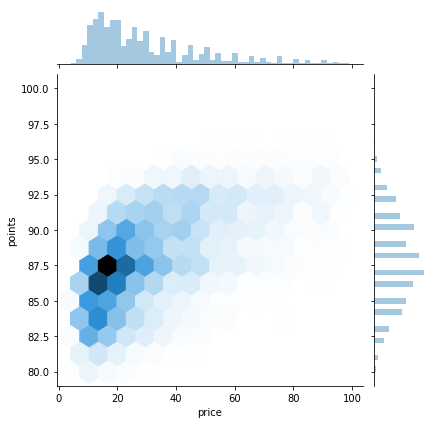

In [57]:
sns.jointplot(x='price',y='points',data=review[review['price']<100],kind='hex',gridsize=15)

In [58]:
review['points'].corr(review['price'])
(review['variety'].value_counts().head(5).index)

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')

pandas.core.frame.DataFrame

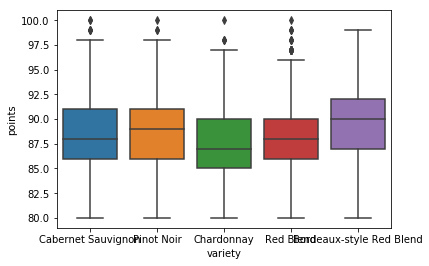

In [59]:
df=review[review['variety'].isin(review['variety'].value_counts().head(5).index)]
sns.boxplot(x='variety',y='points',data=df)
type(df)
#df

In [65]:
review[review['price']<200]['price'].sort_index()

1         110.0
2          90.0
3          65.0
4          66.0
5          73.0
6          65.0
7         110.0
8          65.0
9          60.0
10         80.0
11         48.0
12         48.0
13         90.0
14        185.0
15         90.0
17         80.0
19         75.0
20         24.0
21         79.0
23         60.0
24         45.0
25         57.0
26         62.0
27        105.0
28         60.0
29         60.0
30         15.0
31         37.0
33         22.0
34         42.0
          ...  
149548     17.0
149549     13.0
149611     10.0
149612     13.0
149613     20.0
149614      8.0
149615      8.0
149616      8.0
149617     13.0
149618     19.0
149619     60.0
149620     13.0
149621     10.0
149622     13.0
149623     13.0
149624     50.0
149625     10.0
149626     16.0
149627     21.0
149628      8.0
149629     25.0
149630     27.0
149631    130.0
149632     12.0
149633     40.0
149634     15.0
149635     15.0
149637      6.0
149638      9.0
149639      8.0
Name: price, Length: 885